In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [61]:
data = load_iris()
X = data.data[:, :2]
y = data.target

In [62]:
df = pd.DataFrame(X)
df.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [64]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracy_score(y_test,prediction)

0.9

Text(0.5, 1.0, 'Iris Data with Decision Boundary')

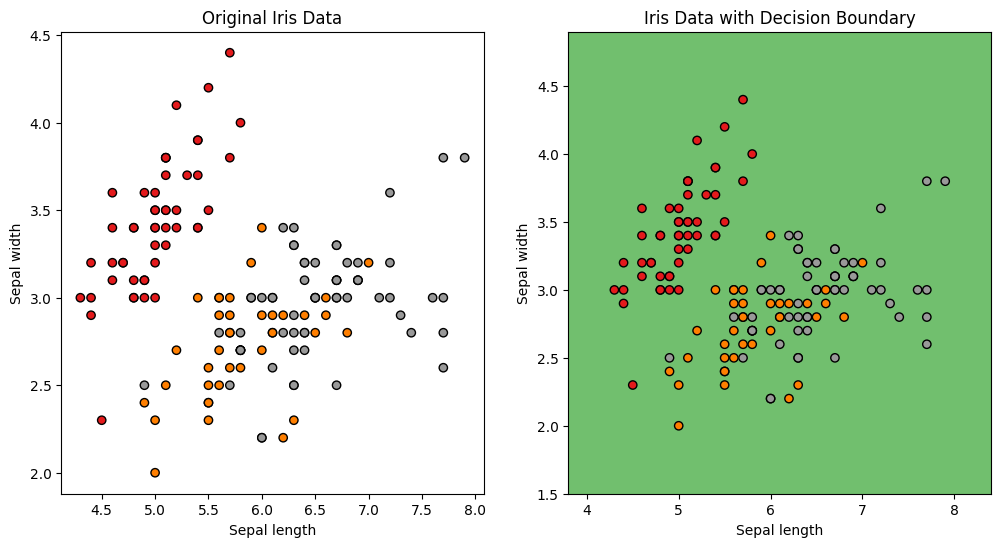

In [74]:
# Plotting the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Original Iris Data')

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the predictions with decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Data with Decision Boundary')


In [81]:
# normalization 
scalar = MinMaxScaler()
scalar.fit(X)
X_new = scalar.transform(X)

Text(0.5, 1.0, 'Original Iris Data')

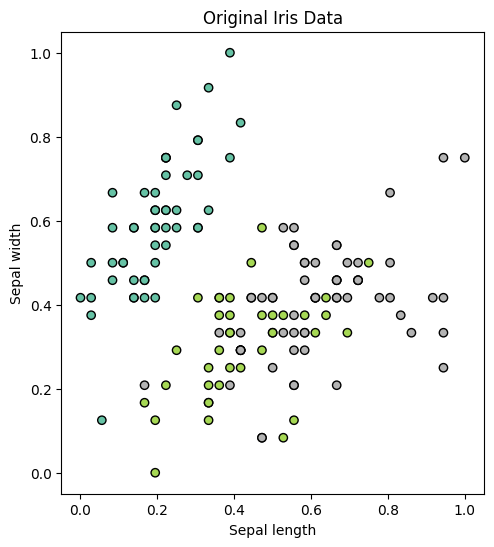

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=plt.cm.Set2, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Original Iris Data')

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state=42, test_size=0.2)

In [83]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(f"Accuracy for Normalization: {accuracy_score(y_test,prediction)}")

Accuracy for Normalization: 0.9333333333333333


In [84]:
scalar = StandardScaler()
scalar.fit(X)
X_new = scalar.transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state=42, test_size=0.2)

In [86]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(f"Accuracy for Standardization: {accuracy_score(y_test,prediction)}")

Accuracy for Standardization: 0.9
